<a href="https://colab.research.google.com/github/PX2145-2025/week-6-b-Lester-Finley/blob/main/Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1**

In [1]:
import numpy as np
from numpy.random import random, normal, seed
import matplotlib.pyplot as plt

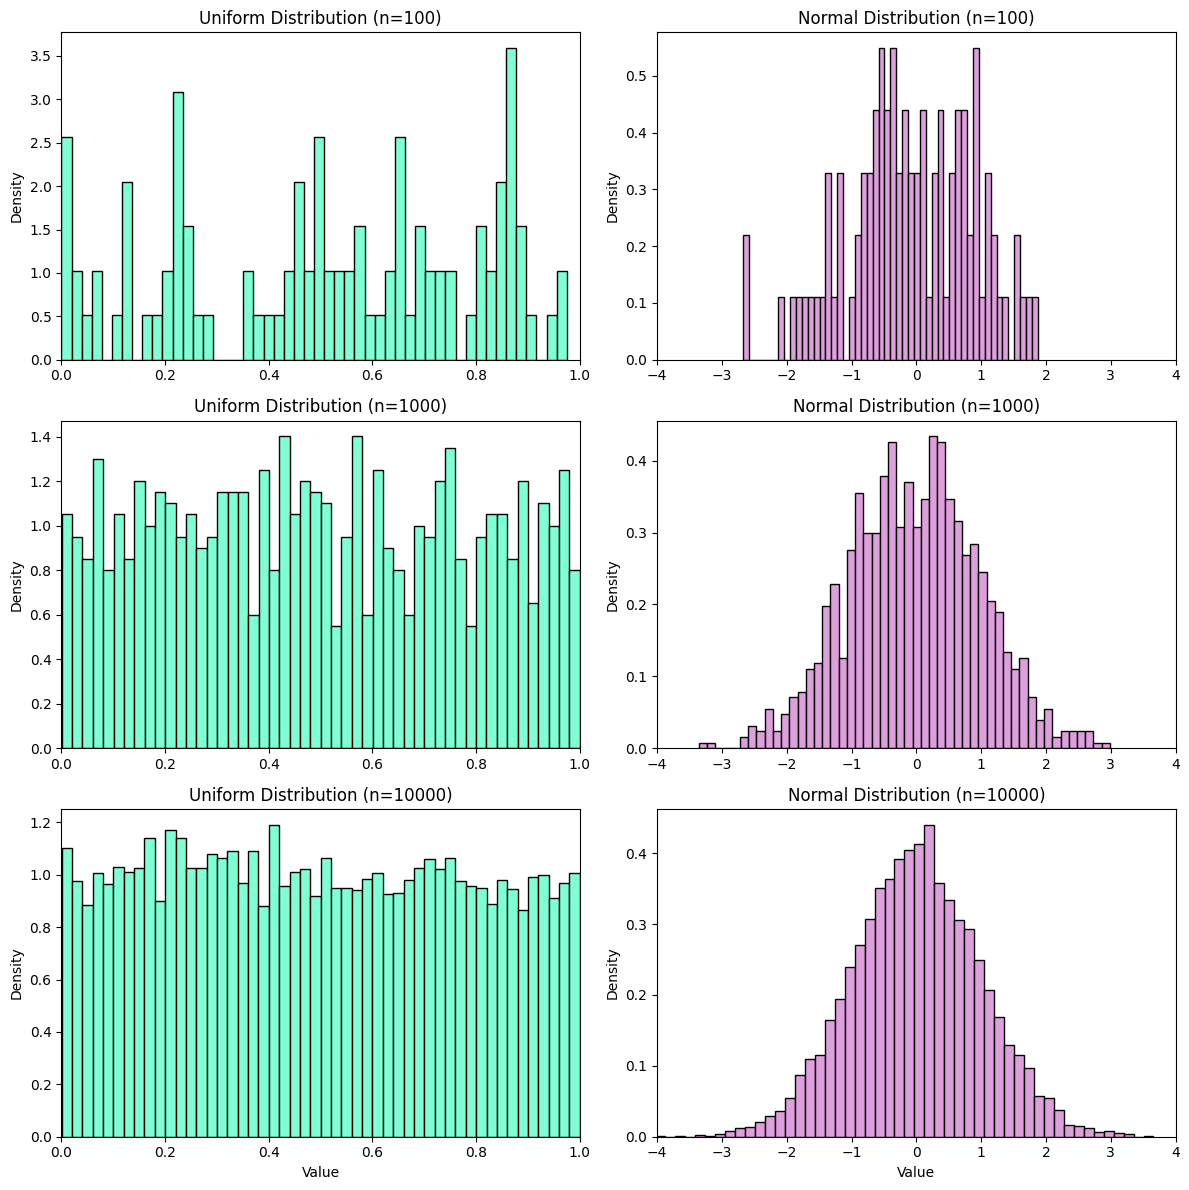

In [18]:
sample_sizes = [100, 1000, 10000]

num_bins = 50

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

for i, n in enumerate(sample_sizes):

    uniform_data = np.random.rand(n)

    normal_data = np.random.randn(n)

    ax_uniform = axes[i, 0]
    ax_uniform.hist(uniform_data,
                    bins=num_bins,
                    density=True,
                    color='aquamarine',
                    edgecolor='black',)
    ax_uniform.set_title(f"Uniform Distribution (n={n})")
    ax_uniform.set_ylabel("Density")
    ax_uniform.set_xlim(0, 1)

    ax_normal = axes[i, 1]
    ax_normal.hist(normal_data,
                   bins=num_bins,
                   density=True,
                   color='plum',
                   edgecolor='black',)
    ax_normal.set_title(f"Normal Distribution (n={n})")
    ax_normal.set_ylabel("Density")
    ax_normal.set_xlim(-4, 4)

axes[-1, 0].set_xlabel("Value")
axes[-1, 1].set_xlabel("Value")

plt.tight_layout()

plt.show()

# **Exercise 2**

In [41]:
import time
from datetime import datetime

Pi(for loop): 3.141596, Time:3.2228 seconds
Pi(vectorized): 3.140916, Time: 0.0282 seconds


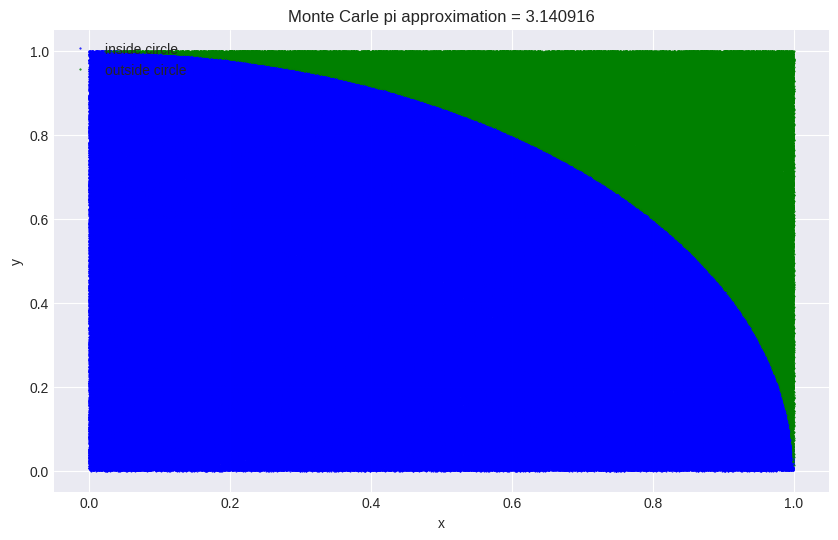

In [43]:
N =1000000
start_time = datetime.now()
count_in = 0
for i in range(N):
  x = np.random.random()
  y = np.random.random()
  if np.sqrt(x**2 + y**2) <= 1.0:
    count_in += 1
pi_for = 4.0 * count_in / N
time_for = datetime.now() - start_time
print(f"Pi(for loop): {pi_for:.6f}, Time:{time_for.total_seconds():.4f} seconds")

start_time = datetime.now()
x = np.random.random(N)
y = np.random.random(N)
inpond = np.sqrt(x**2 + y**2) <= 1.0
pi_vec = 4.0 * np.sum(inpond) / N
time_vec = datetime.now() - start_time
print(f"Pi(vectorized): {pi_vec:.6f}, Time: {time_vec.total_seconds():.4f} seconds")

plt.figure(figsize=(10,6))
plt.plot(x[inpond==True], y[inpond==True], 'b.', markersize=1, label='inside circle')
plt.plot(x[inpond==False], y[inpond==False], 'g.', markersize=1, label='outside circle')
plt.title(f"Monte Carle pi approximation = {pi_vec:.6f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# **Exercise 3**

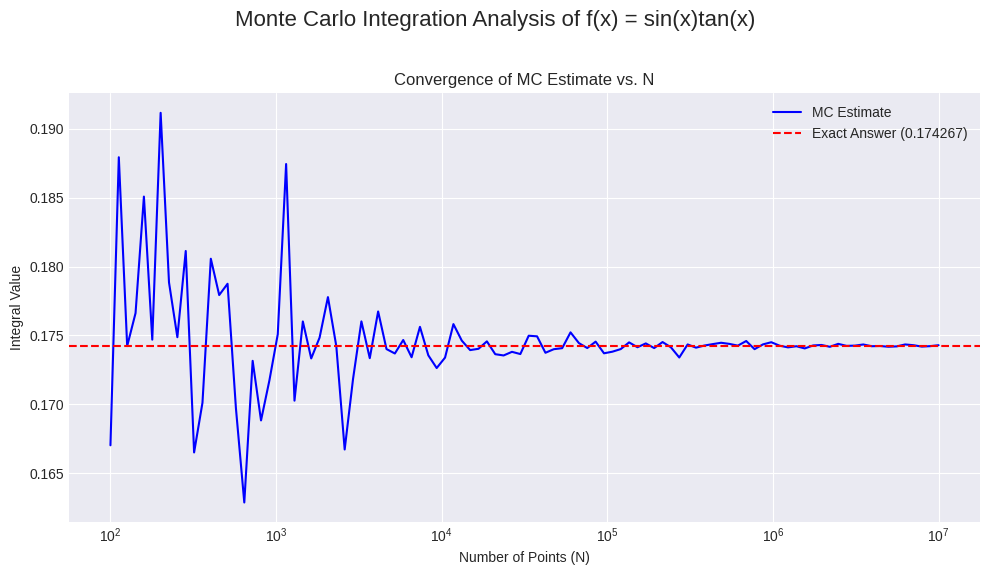

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) * np.tan(x)

a = 0
b = np.pi / 4
interval_width = b - a
exact_answer = 0.1742668059
N_values = np.logspace(2, 7, 100)
mc_answers = []
for N in N_values:
    n_int = int(N)
    u = np.random.rand(n_int)
    x = a + interval_width * u
    y = f(x)
    integral_approx = interval_width * np.mean(y)
    mc_answers.append(integral_approx)


fig, (ax) = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle('Monte Carlo Integration Analysis of f(x) = sin(x)tan(x)', fontsize=16)

ax.plot(N_values, mc_answers, 'b-', label='MC Estimate')
ax.axhline(exact_answer, color='r', linestyle='--', label=f'Exact Answer ({exact_answer:.6f})')
ax.set_xlabel('Number of Points (N)')
ax.set_ylabel('Integral Value')
ax.set_xscale('log')
ax.set_title('Convergence of MC Estimate vs. N')
ax.legend()


plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()